# Professionelle Aktiencharts Erstellen

## Importe

In [53]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from mplfinance.original_flavor import candlestick_ohlc

## Die Chartfunktion

In [54]:
def plot_ticker(ticker):
    # load ticker data
    df = pd.read_csv(f'./data/{ticker}.csv', sep=';', parse_dates=True, header=0, index_col=0)
    df = df.tail(110)
    
    # general fig and ax formatting
    fig = plt.figure(figsize=(26, 30), facecolor='w')
    ax = plt.subplot2grid((15, 10), (0, 0), rowspan=6, colspan=16, facecolor='w')
    ax.grid(True, color='#262626', linewidth=.5, linestyle='--')
    ax.xaxis.set_major_locator(mticker.MaxNLocator(prune='upper', nbins=6))
    ax.spines['bottom'].set_color('#262626')
    ax.spines['top'].set_color('#262626')
    ax.spines['left'].set_color('#262626')
    ax.spines['right'].set_color('#262626')
    ax.tick_params(axis='both', colors='#262626')
    ax.yaxis.label.set_color('#262626')
    plt.ylabel('Stock Price', color='#262626')

    for label in ax.xaxis.get_ticklabels():
        label.set_rotation(45)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    ax.axes.xaxis.set_visible(True)
    ax.set_xlim(min(df.index.date), max(df.index.date))
    
    # candlestick chart
    arr = []
    for x in range(len(df.index.date)):
        a = df.index.date[x].toordinal(), df.Open[x], df.High[x], df.Low[x], df.Close[x], df.Volume[x]
        arr.append(a)
    #ax.plot(df.index.date, df['Close'], label='Close', color='grey', linewidth=0.5)
    candlestick_ohlc(ax, arr, width=1, colorup='#00ffcc', colordown='orange')

    plt.savefig('candlestick.png',bbox_inches='tight')
    
    return plt.show()

## Anwendungsbeispiel

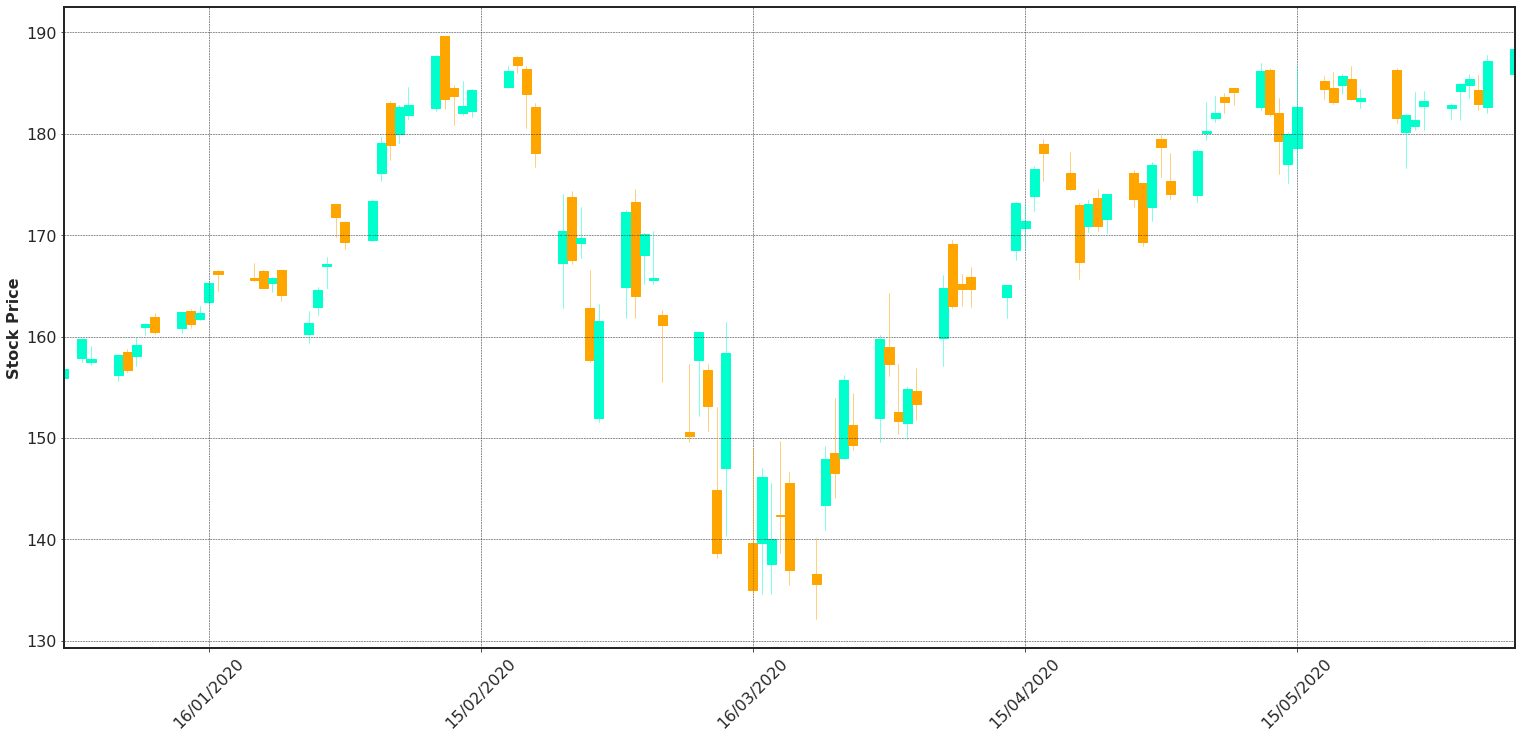

In [55]:
ticker = 'MSFT'
plot_ticker(ticker)